***"Deteksi Jenis Cuaca dari Citra Langit Menggunakan CNN"***

Disusun oleh Kelompok 4 :

1. Yezha Amanando Rifky Zafian - (23.11.5629)
2. Muhamad Riyan Faujan - (2303010121)
3. Alfiyah Adwa - (2303010127)
4. Jerico Rosales Siahay - (23.11.5685)



1. Import Library

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil


2. Download Dataset (KaggleHub)

In [3]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("pratik2901/multiclass-weather-dataset")

print("Dataset path:", path)


100%|██████████| 91.4M/91.4M [00:01<00:00, 82.9MB/s]

Extracting files...


Dataset path: /root/.cache/kagglehub/datasets/pratik2901/multiclass-weather-dataset/versions/3


3. Pindahkan Dataset ke Folder Kerja

In [4]:
destination = "/content/dataset_weather"

if os.path.exists(destination):
    shutil.rmtree(destination)

shutil.copytree(path, destination)

print("Dataset dipindahkan ke:", destination)


Dataset dipindahkan ke: /content/dataset_weather


4. Preprocessing & Pembagian Data

In [5]:
img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    "/content/dataset_weather/Multi-class Weather Dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    "/content/dataset_weather/Multi-class Weather Dataset",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


5. Arsitektur Model CNN

In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6. Compile Mode

In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

7. Training Model

In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=25
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5063 - loss: 1.0777 - val_accuracy: 0.8080 - val_loss: 0.6292
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7796 - loss: 0.5942 - val_accuracy: 0.7188 - val_loss: 0.8422
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7728 - loss: 0.5792 - val_accuracy: 0.7500 - val_loss: 0.7556
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.8706 - loss: 0.3777 - val_accuracy: 0.8170 - val_loss: 0.5010
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8879 - loss: 0.3269 - val_accuracy: 0.7098 - val_loss: 0.7247
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8149 - loss: 0.4671 - val_accuracy: 0.7991 - val_loss: 0.5260
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.8971 - loss: 0.3241 - val_accuracy: 0.7723 - val_loss: 0.5707
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.9180 - loss: 0.2497 - val_accuracy: 0.8036 - val_loss:

8. Visualisasi Hasil Training

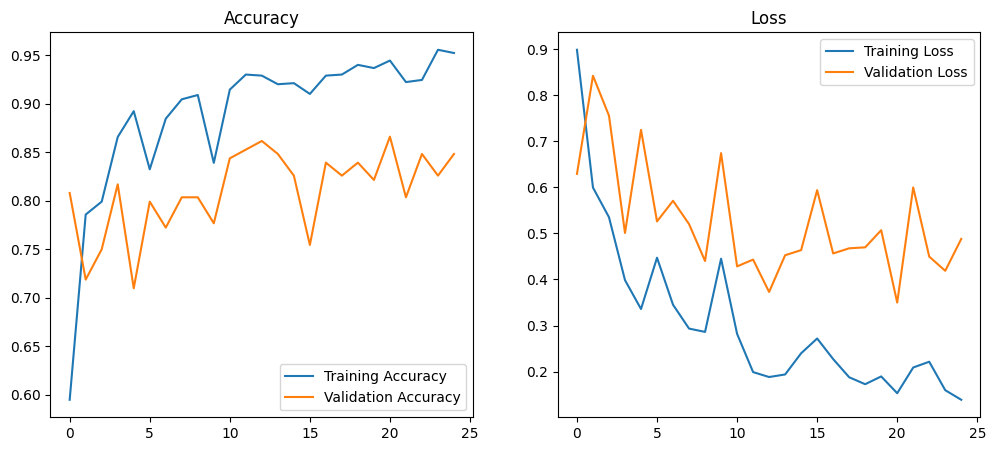

In [9]:
plt.figure(figsize=(12,5))

# Akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


9. Evaluasi Model

In [10]:
loss, accuracy = model.evaluate(val_data)
print("Validation Accuracy:", accuracy)


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 487ms/step - accuracy: 0.8748 - loss: 0.3786
Validation Accuracy: 0.8526785969734192


10. Prediksi Gambar Baru

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


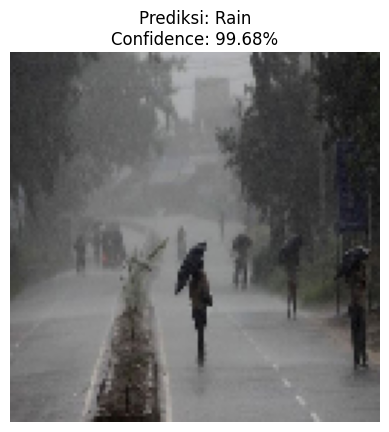

In [11]:
from tensorflow.keras.preprocessing import image

img_path = "/content/dataset_weather/Multi-class Weather Dataset/Rain/rain10.jpg"  # ganti dengan path gambar uji

# Load dan preprocessing gambar
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Prediksi
prediction = model.predict(img_array)
class_names = list(train_data.class_indices.keys())
predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction) * 100

# Tampilkan gambar + hasil prediksi
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediksi: {predicted_class}\nConfidence: {confidence:.2f}%")
plt.show()

11. Simpan Model

In [12]:
model.save("/content/model_deteksi_cuaca_cnn.h5")
